In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('oasis_longitudinal.csv')

In [3]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [4]:
df['SES'].fillna(df['SES'].mean(), inplace=True)

In [6]:
df.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          2
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [7]:
df.drop(['Hand', 'MRI ID', 'Subject ID', 'Visit'], axis=1, inplace=True)

In [8]:
df['M/F'] = df['M/F'].replace(['M','F'], [0,1])

In [9]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

In [10]:
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])

In [11]:
df.describe()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.487871,593.876011,0.568733,77.018868,14.611860,2.460452,27.342318,0.287062,1489.876011,0.729526,1.193776
std,0.500528,636.636500,0.495922,7.660864,2.877737,1.107647,3.683244,0.371912,174.990473,0.037229,0.136533
min,0.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.500000,0.700000,1.098500
50%,0.000000,552.000000,1.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1471.000000,0.729000,1.193000
75%,1.000000,869.500000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1598.000000,0.756000,1.292000
max,1.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Group       0.777360
MR Delay   -0.067299
M/F        -0.213504
Age        -0.025147
EDUC       -0.145614
SES         0.074115
MMSE       -0.686519
CDR         1.000000
eTIV        0.042450
nWBV       -0.350473
ASF        -0.053767
Name: CDR, dtype: float64


<Axes: >

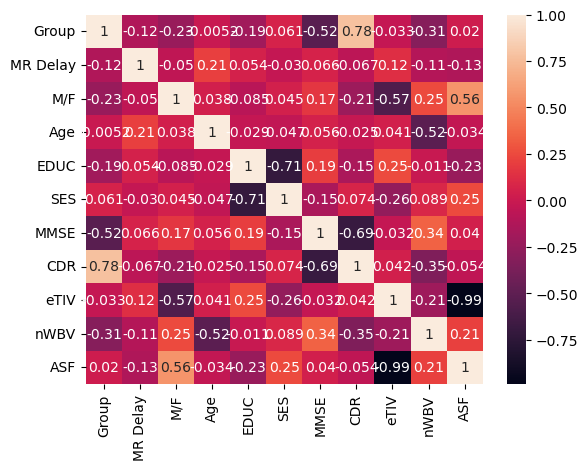

In [12]:
import seaborn as sb

cor_matrix= df.corr()
print(cor_matrix['CDR'])
sb.heatmap(cor_matrix, annot=True)

(array([ 1.,  0.,  0.,  0.,  2.,  1.,  3.,  1.,  2.,  5.,  1.,  5.,  0.,
         7.,  3.,  8.,  1.,  5.,  3.,  6.,  9.,  4.,  5.,  8., 19.,  5.,
        10.,  6.,  3., 10.,  5.,  2.,  9.,  8.,  4.,  2.,  4.,  3.,  4.,
         4.,  2.,  3.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([0.644  , 0.64786, 0.65172, 0.65558, 0.65944, 0.6633 , 0.66716,
        0.67102, 0.67488, 0.67874, 0.6826 , 0.68646, 0.69032, 0.69418,
        0.69804, 0.7019 , 0.70576, 0.70962, 0.71348, 0.71734, 0.7212 ,
        0.72506, 0.72892, 0.73278, 0.73664, 0.7405 , 0.74436, 0.74822,
        0.75208, 0.75594, 0.7598 , 0.76366, 0.76752, 0.77138, 0.77524,
        0.7791 , 0.78296, 0.78682, 0.79068, 0.79454, 0.7984 , 0.80226,
        0.80612, 0.80998, 0.81384, 0.8177 , 0.82156, 0.82542, 0.82928,
        0.83314, 0.837  ]),
 <BarContainer object of 50 artists>)

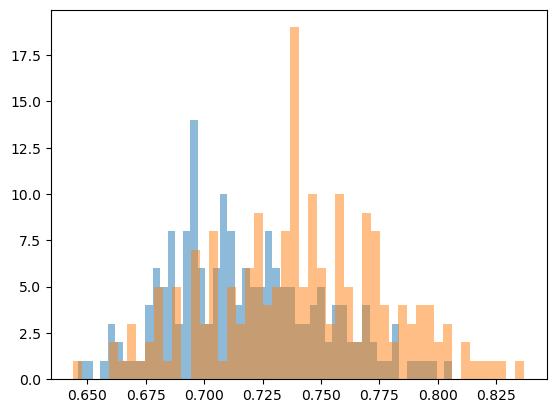

In [13]:
group_demented = df.loc[df['Group']==1,'nWBV']
group_nondemented = df.loc[df['Group']==0,'nWBV']
plt.hist(group_demented, bins=50, alpha=0.5, label='demented', density=False)
plt.hist(group_nondemented, bins=50, alpha=0.5, label='nondemented', density=False)
#sns.histplot(x='nWBV',data=df,hue='Group')

In [14]:
X = df.iloc[:, 1:] 
y = df.iloc[:, 0] 

In [16]:
X.describe()

,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,593.876011,0.568733,77.018868,14.611860,2.460452,27.342318,0.287062,1489.876011,0.729526,1.193776
std,636.636500,0.495922,7.660864,2.877737,1.107647,3.683244,0.371912,174.990473,0.037229,0.136533
min,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.500000,0.700000,1.098500
50%,552.000000,1.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1471.000000,0.729000,1.193000
75%,869.500000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1598.000000,0.756000,1.292000
max,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [17]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.1, random_state=10, stratify=y_train1)

In [18]:
s = StandardScaler()
s.fit(X_train)
X_train_std = s.transform(X_train)
X_val_std = s.transform(X_val)
X_train_std = pd.DataFrame(X_train_std)
X_val_std = pd.DataFrame(X_val_std)
X_train_std.columns = list(X.columns)
X_val_std.columns = list(X.columns)

In [19]:
X_train_std.describe()

,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,-5.940993e-17,5.049844e-17,6.713322e-16,2.376397e-16,1.812003e-16,-2.079347e-16,5.940993e-18,-1.232756e-16,3.730943e-15,-1.048585e-15
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-9.182195e-01,-1.140175e+00,-2.152406e+00,-2.944653e+00,-1.313524e+00,-5.928249e+00,-7.991532e-01,-2.201381e+00,-2.270787e+00,-2.332556e+00
25%,-9.182195e-01,-1.140175e+00,-7.530656e-01,-8.794819e-01,-4.227605e-01,-3.003053e-01,-7.991532e-01,-7.413860e-01,-8.037869e-01,-6.655922e-01
50%,-1.217834e-01,8.770580e-01,1.021106e-02,1.531035e-01,-4.227605e-01,4.671416e-01,-7.991532e-01,-8.194068e-02,-3.664012e-02,-3.682519e-02
75%,4.407786e-01,8.770580e-01,6.462750e-01,4.972987e-01,4.680031e-01,7.229572e-01,6.064162e-01,5.861436e-01,7.035893e-01,7.016104e-01
max,3.059220e+00,8.770580e-01,2.554467e+00,2.906665e+00,2.249530e+00,7.229572e-01,4.823124e+00,2.970514e+00,2.924277e+00,2.865739e+00


In [20]:
from sklearn.model_selection import GridSearchCV

#----------------K NEAREST-----------------

parameters = {'n_neighbors':[1,2,3,4,5], 'metric':('hamming', 'euclidean', 'manhattan')}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters, scoring='recall', cv=5, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .....metric=hamming, n_neighbors=1;, score=0.759 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=1;, score=0.897 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=1;, score=0.931 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=1;, score=0.828 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=1;, score=0.793 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=2;, score=0.724 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=2;, score=0.793 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=2;, score=0.793 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=2;, score=0.759 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=2;, score=0.621 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=3;, score=0.862 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=3;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('hamming', 'euclidean', 'manhattan'),
                         'n_neighbors': [1, 2, 3, 4, 5]},
             scoring='recall', verbose=3)

In [21]:
print("Najveca preciznost: ", clf.best_score_)
print("Najbolji hiperparametri: ", clf.best_params_)

Najveca preciznost:  0.8827586206896552
Najbolji hiperparametri:  {'metric': 'hamming', 'n_neighbors': 5}


In [22]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='hamming')
classifier.fit(X_train_std,y_train)
y_pred = classifier.predict(X_val_std)

[[16  1]
 [ 4 13]]


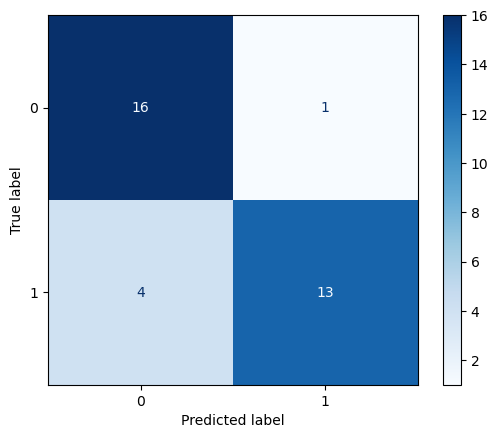

In [23]:
conf_mat = confusion_matrix(y_val, y_pred, labels=classifier.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues")

In [34]:
from sklearn import metrics
precision = metrics.precision_score(y_val, y_pred)
accuracy = metrics.accuracy_score(y_val, y_pred)
sensitivity = metrics.recall_score(y_val, y_pred)
f_score = metrics.f1_score(y_val, y_pred)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

precision:  0.9285714285714286
accuracy:  0.8529411764705882
sensitivity/recall:  0.7647058823529411
F score:  0.8387096774193549


In [49]:
from sklearn.ensemble import RandomForestClassifier

parameters = { 'n_estimators': [10, 100], 'max_features': ['sqrt', 'log2'], 'max_depth': [1,50],
    'criterion' :['gini', 'entropy']}
classifier1 = RandomForestClassifier()
clf_rsf = GridSearchCV(classifier1,parameters, scoring='recall', cv=5, verbose=3)
clf_rsf.fit(X_train_std, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.724 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.897 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.966 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.690 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.897 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100;, score=0.862 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100;, score=0.897 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100;, score=0.966 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=s

[CV 5/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.897 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=100;, score=0.862 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=100;, score=0.897 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=100;, score=0.966 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=100;, score=0.966 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=100;, score=0.897 total time=   0.1s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 50],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='recall', verbose=3)

In [50]:
print("Najbolja senzitivnost: ", clf_rsf.best_score_)
print("Najbolji hiperparametri: ", clf_rsf.best_params_)

Najbolja senzitivnost:  0.9241379310344829
Najbolji hiperparametri:  {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 100}


In [53]:
classifier_rsf=RandomForestClassifier(random_state=42, n_estimators= 100, max_depth=50, criterion='entropy',max_features='sqrt', oob_score=True)
classifier_rsf.fit(X_train_std, y_train)
y_pred_rsf = classifier_rsf.predict(X_val_std)

[[17  0]
 [ 4 13]]


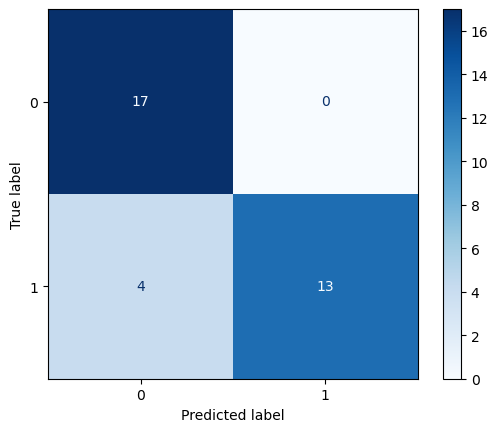

In [54]:
conf_mat = confusion_matrix(y_val, y_pred_rsf, labels=classifier_rsf.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_rsf.classes_)
disp.plot(cmap="Blues")

In [55]:
precision1 = metrics.precision_score(y_val, y_pred_rsf)
accuracy1 = metrics.accuracy_score(y_val, y_pred_rsf)
sensitivity1 = metrics.recall_score(y_val, y_pred_rsf)
f_score1 = metrics.f1_score(y_val, y_pred_rsf)

print('precision: ', precision1)
print('accuracy: ', accuracy1)
print('sensitivity/recall: ', sensitivity1)
print('F score: ', f_score1)

precision:  1.0
accuracy:  0.8823529411764706
sensitivity/recall:  0.7647058823529411
F score:  0.8666666666666666


In [24]:
from sklearn.neural_network import MLPClassifier

parameters_nn = {'hidden_layer_sizes':[(10,30,10) ,(25), (25)], 'solver':['sgd','adam'],
                 'activation':['tanh', 'relu'], 'max_iter':[800]}
classifier_nn = MLPClassifier()
clf = GridSearchCV(classifier_nn, parameters_nn, scoring='recall', cv=5, verbose=3)
clf.fit(X_train_std, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=sgd;, score=0.759 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=sgd;, score=0.621 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=sgd;, score=1.000 total time=   0.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=sgd;, score=0.724 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=sgd;, score=0.759 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=adam;, score=0.862 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=adam;, score=0.862 total time=   0.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=adam;, score=0.828 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=adam;, score=0.862 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=adam;, score=0.793 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.862 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.897 total time=   0.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-pa

[CV 3/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.966 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.552 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.724 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.759 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.966 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.862 total time=   0.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-pa

[CV 4/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.931 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.483 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.862 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.621 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.828 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.828 total time=   0.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-pa

[CV 5/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.552 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.793 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.724 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.828 total time=   0.1s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.862 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.483 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=sgd;, score=1.000 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=sgd;, score=0.000 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=sgd;, score=0.000 total time=   0.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-pa

[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=sgd;, score=0.207 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=sgd;, score=0.897 total time=   0.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=adam;, score=0.069 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=adam;, score=0.793 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=adam;, score=0.828 total time=   0.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-pa

[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=adam;, score=0.793 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=30, solver=adam;, score=0.966 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.828 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.724 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.000 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.000 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.793 total time=   0.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-pa

[CV 1/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.828 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.724 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.759 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.897 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.552 total time=   0.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.621 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.483 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=1.000 total time=   0.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-pa

[CV 4/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.793 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=sgd;, score=0.828 total time=   0.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.724 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.724 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.207 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.862 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=25, max_iter=30, solver=adam;, score=0.586 total time=   0.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/neda/anaconda3/lib/python3.11/site-pa

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 30, 10), 25, 25],
                         'max_iter': [30], 'solver': ['sgd', 'adam']},
             scoring='recall', verbose=3)

In [25]:
print("Najbolja senzitivnost: ", clf.best_score_)
print("Najbolji hiperparametri: ", clf.best_params_)

Najbolja senzitivnost:  0.8413793103448276
Najbolji hiperparametri:  {'activation': 'tanh', 'hidden_layer_sizes': (10, 30, 10), 'max_iter': 30, 'solver': 'adam'}


In [27]:
classifier_nn = MLPClassifier(hidden_layer_sizes =(10,30,10),max_iter = 30, activation = 'tanh', solver='adam')
classifier_nn.fit(X_train_std,y_train)
y_pred_nn = classifier_nn.predict(X_val_std)

/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[[16  1]
 [ 4 13]]


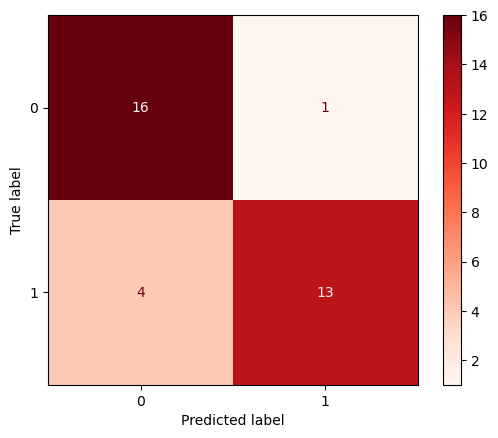

In [61]:
conf_mat = confusion_matrix(y_val, y_pred_nn, labels=classifier_nn.classes_) 
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_nn.classes_)
disp.plot(cmap="Reds")

In [62]:
precision = metrics.precision_score(y_val, y_pred_nn)
accuracy = metrics.accuracy_score(y_val, y_pred_nn)
sensitivity = metrics.recall_score(y_val, y_pred_nn)
f_score = metrics.f1_score(y_val, y_pred_nn)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

precision:  0.9285714285714286
accuracy:  0.8529411764705882
sensitivity/recall:  0.7647058823529411
F score:  0.8387096774193549


In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=0.9)
pca.fit(X_train_std)
X_train_r = pca.transform(X_train_std)
X_test_r = pca.transform(X_val_std)

In [66]:
parameters = {'n_neighbors':[1,2,3,4,5], 'metric':('hamming', 'euclidean', 'manhattan')}
classifier_knnp = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters, scoring='recall', cv=5, verbose=3)
clf.fit(X_train_r, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .....metric=hamming, n_neighbors=1;, score=1.000 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=1;, score=0.000 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=1;, score=0.000 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=1;, score=0.000 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=1;, score=0.000 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=2;, score=0.000 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=2;, score=0.000 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=2;, score=0.000 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=2;, score=0.000 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=2;, score=0.000 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=3;, score=0.000 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=3;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='hamming'),
             param_grid={'metric': ('hamming', 'euclidean', 'manhattan'),
                         'n_neighbors': [1, 2, 3, 4, 5]},
             scoring='recall', verbose=3)

In [67]:
print("Najveca preciznost: ", clf.best_score_)
print("Najbolji hiperparametri: ", clf.best_params_)

Najveca preciznost:  0.9103448275862069
Najbolji hiperparametri:  {'metric': 'euclidean', 'n_neighbors': 1}


In [68]:
knn_pca = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_pca.fit(X_train_r,y_train)
y_pred_pca = knn_pca.predict(X_test_r)

[[15  2]
 [ 2 15]]


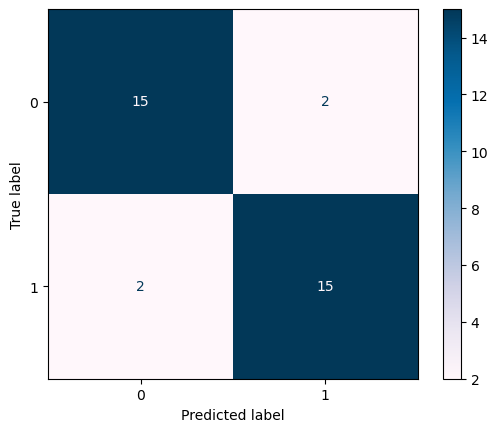

In [70]:
conf_mat = confusion_matrix(y_val, y_pred_pca, labels=knn_pca.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=knn_pca.classes_)
disp.plot(cmap="PuBu")

In [73]:
precision_pca = metrics.precision_score(y_val, y_pred_pca)
accuracy_pca= metrics.accuracy_score(y_val, y_pred_pca)
sensitivity_pca = metrics.recall_score(y_val, y_pred_pca)
f_score_pca = metrics.f1_score(y_val, y_pred_pca)

print('precision: ', precision_pca)
print('accuracy: ', accuracy_pca)
print('sensitivity/recall: ', sensitivity_pca)
print('F score: ', f_score_pca)

precision:  0.8823529411764706
accuracy:  0.8823529411764706
sensitivity/recall:  0.8823529411764706
F score:  0.8823529411764706


In [76]:
parameters = { 'n_estimators': [10, 100], 'max_features': ['sqrt', 'log2'], 'max_depth' : [1,70],
    'criterion' :['gini', 'entropy']}
classifier_rsf = RandomForestClassifier()
clf_pca_rsf = GridSearchCV(classifier_rsf, parameters, scoring='recall', cv=5, verbose=3)
clf_pca_rsf.fit(X_train_r, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.690 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.724 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.517 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.586 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=10;, score=0.552 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100;, score=0.655 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100;, score=0.724 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100;, score=0.655 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, max_features=s

[CV 1/5] END criterion=entropy, max_depth=70, max_features=log2, n_estimators=100;, score=0.828 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=70, max_features=log2, n_estimators=100;, score=0.862 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=70, max_features=log2, n_estimators=100;, score=0.828 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=70, max_features=log2, n_estimators=100;, score=0.897 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=70, max_features=log2, n_estimators=100;, score=0.793 total time=   0.2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 70],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='recall', verbose=3)

In [77]:
print("Najveca senzitivnost ", clf_pca_rsf.best_score_)
print("Najbolji hiperparametri: ", clf_pca_rsf.best_params_)

Najveca senzitivnost  0.8551724137931036
Najbolji hiperparametri:  {'criterion': 'entropy', 'max_depth': 70, 'max_features': 'sqrt', 'n_estimators': 100}


In [79]:
classifier_rsfp=RandomForestClassifier(random_state=42, n_estimators= 100, max_depth=70, criterion='entropy',max_features='sqrt', oob_score=True)
classifier_rsfp.fit(X_train_r, y_train)
y_pred_rsfp = classifier_rsfp.predict(X_test_r)

[[17  0]
 [ 5 12]]


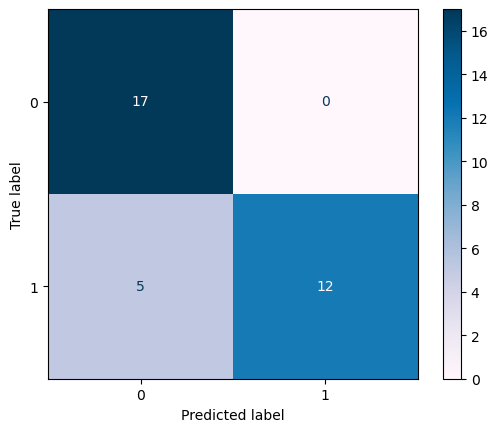

In [80]:
conf_mat = confusion_matrix(y_val, y_pred_rsfp, labels=classifier_rsfp.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_rsfp.classes_)
disp.plot(cmap="PuBu")

In [83]:
precision_pca_rsf = metrics.precision_score(y_val, y_pred_rsf)
accuracy_pca_rsf= metrics.accuracy_score(y_val, y_pred_rsf)
sensitivity_pca_rsf = metrics.recall_score(y_val, y_pred_rsf)
f_score_pca_rsf = metrics.f1_score(y_val, y_pred_rsf)

print('precision: ', precision_pca_rsf)
print('accuracy: ', accuracy_pca_rsf)
print('sensitivity/recall: ', sensitivity_pca_rsf)
print('F score: ', f_score_pca_rsf)

precision:  1.0
accuracy:  0.8823529411764706
sensitivity/recall:  0.7647058823529411
F score:  0.8666666666666666


In [89]:
parameters_nnp = {'hidden_layer_sizes':[(10,30,10) ,(25), (25)], 'solver':['sgd','adam'],
                 'activation':['tanh', 'relu'], 'max_iter':[800]}
classifier_nnp = MLPClassifier()
clf = GridSearchCV(classifier_nnp, parameters_nnp, scoring='recall', cv=5, verbose=3)
clf.fit(X_train_r, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=sgd;, score=0.862 total time=   0.5s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=sgd;, score=0.931 total time=   0.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=sgd;, score=0.966 total time=   0.6s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=sgd;, score=0.931 total time=   0.6s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=sgd;, score=0.897 total time=   0.5s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=adam;, score=0.862 total time=   0.8s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=adam;, score=0.931 total time=   1.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=adam;,

/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=sgd;, score=0.862 total time=   0.9s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=adam;, score=0.862 total time=   0.9s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=adam;, score=0.897 total time=   1.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=adam;, score=0.966 total time=   1.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=adam;, score=0.931 total time=   1.0s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), max_iter=800, solver=adam;, score=0.897 total time=   1.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=sgd;, score=0.862 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=sgd;, score=0.931 total time=   0.5s


/Users/neda/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=sgd;, score=0.966 total time=   0.6s
[CV 4/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=sgd;, score=0.966 total time=   0.6s
[CV 5/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=sgd;, score=0.862 total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=adam;, score=0.862 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=adam;, score=0.931 total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=adam;, score=0.966 total time=   0.5s
[CV 4/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=adam;, score=0.931 total time=   0.4s
[CV 5/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=adam;, score=0.897 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=25, max_iter=800, solver=sgd;, score=0.862 total time=   0

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 30, 10), 25, 25],
                         'max_iter': [800], 'solver': ['sgd', 'adam']},
             scoring='recall', verbose=3)

In [91]:
print("Najveca senzitivnost ", clf.best_score_)
print("Najbolji hiperparametri: ", clf.best_params_)

Najveca senzitivnost  0.9241379310344829
Najbolji hiperparametri:  {'activation': 'tanh', 'hidden_layer_sizes': 25, 'max_iter': 800, 'solver': 'sgd'}


In [101]:
classifier_nnp = MLPClassifier(hidden_layer_sizes =(10,20,10),max_iter = 800, activation = 'tanh', solver='sgd')
classifier_nnp.fit(X_train_r,y_train)
y_pred_nnp = classifier_nnp.predict(X_test_r)

[[17  0]
 [ 4 13]]


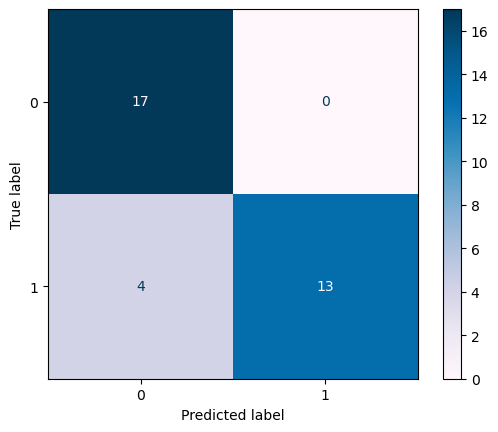

In [102]:
conf_mat = confusion_matrix(y_val, y_pred_nnp, labels=classifier_nnp.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_nnp.classes_)
disp.plot(cmap="PuBu")

In [103]:
precision_nnp = metrics.precision_score(y_val, y_pred_nnp)
accuracy_nnp = metrics.accuracy_score(y_val, y_pred_nnp)
sensitivity_nnp = metrics.recall_score(y_val, y_pred_nnp)
f_score_nnp = metrics.f1_score(y_val, y_pred_nnp)

print('precision: ', precision_nnp)
print('accuracy: ', accuracy_nnp)
print('sensitivity/recall: ', sensitivity_nnp)
print('F score: ', f_score_nnp)

precision:  1.0
accuracy:  0.8823529411764706
sensitivity/recall:  0.7647058823529411
F score:  0.8666666666666666


In [104]:
s = StandardScaler()
s.fit(X_train1)
X_train1_std = s.transform(X_train1)
X_test_std = s.transform(X_test)
X_train1_std = pd.DataFrame(X_train1_std)
X_test_std = pd.DataFrame(X_test_std)
X_train1_std.columns = list(X.columns)
X_test_std.columns = list(X.columns)

In [122]:
classifier_final=RandomForestClassifier(random_state=42, n_estimators= 100, max_depth=8, criterion='gini',max_samples=100, oob_score=True)
classifier_final.fit(X_train1_std, y_train1)
y_pred_final = classifier_final.predict(X_test_std)

[[18  1]
 [ 2 17]]


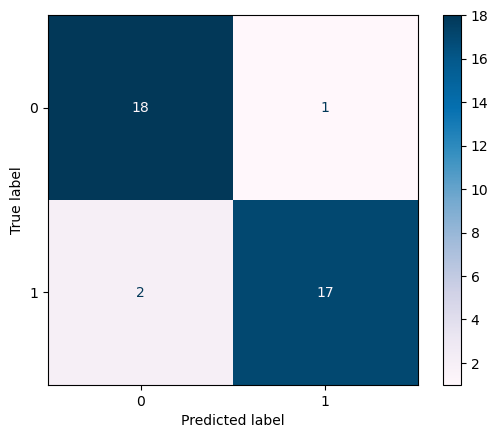

In [123]:
conf_mat = confusion_matrix(y_test, y_pred_final, labels=classifier_final.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_final.classes_)
disp.plot(cmap="PuBu")

In [108]:
precision_final = metrics.precision_score(y_test, y_pred_final)
accuracy_final = metrics.accuracy_score(y_test, y_pred_final)
sensitivity_final = metrics.recall_score(y_test, y_pred_final)
f_score_final = metrics.f1_score(y_test, y_pred_final)

print('precision: ', precision_final)
print('accuracy: ', accuracy_final)
print('sensitivity/recall: ', sensitivity_final)
print('F score: ', f_score_final)

precision:  0.9444444444444444
accuracy:  0.9210526315789473
sensitivity/recall:  0.8947368421052632
F score:  0.918918918918919


In [124]:
pca1 = PCA(n_components=0.9)
pca1.fit(X_train1)
X_train1_r = pca.transform(X_train1_std)
X_test1_r = pca.transform(X_test_std)

In [125]:
classifier_final1=RandomForestClassifier(random_state=42, n_estimators= 100, max_depth=8, criterion='gini',max_samples=100, oob_score=True)
classifier_final1.fit(X_train1_r, y_train1)
y_pred_final1 = classifier_final1.predict(X_test1_r)

[[19  0]
 [ 3 16]]


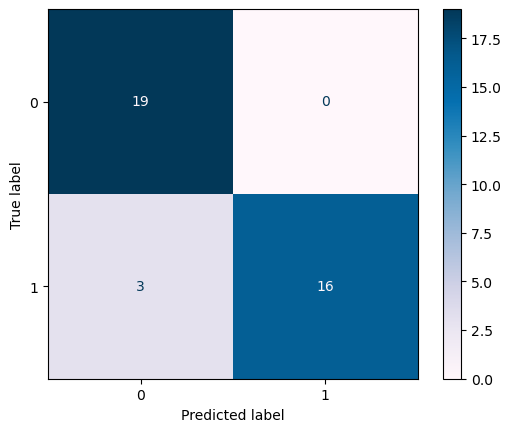

In [126]:
conf_mat = confusion_matrix(y_test, y_pred_final1, labels=classifier_final1.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_final1.classes_)
disp.plot(cmap="PuBu")

In [114]:
precision_final1 = metrics.precision_score(y_test, y_pred_final1)
accuracy_final1 = metrics.accuracy_score(y_test, y_pred_final1)
sensitivity_final1 = metrics.recall_score(y_test, y_pred_final1)
f_score_final1 = metrics.f1_score(y_test, y_pred_final1)

print('precision: ', precision_final1)
print('accuracy: ', accuracy_final1)
print('sensitivity/recall: ', sensitivity_final1)
print('F score: ', f_score_final1)

precision:  1.0
accuracy:  0.9210526315789473
sensitivity/recall:  0.8421052631578947
F score:  0.9142857142857143


In [127]:
knn_pca1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_pca1.fit(X_train1_r,y_train1)
y_pred_pca_knn = knn_pca1.predict(X_test1_r)

[[15  4]
 [ 1 18]]


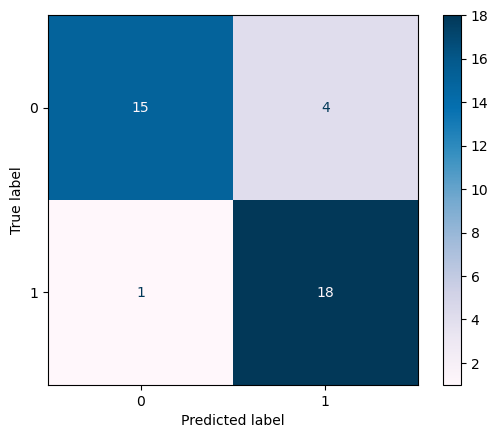

In [128]:
conf_mat = confusion_matrix(y_test, y_pred_pca_knn, labels=knn_pca1.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=knn_pca1.classes_)
disp.plot(cmap="PuBu")

In [129]:
precision_final_knn = metrics.precision_score(y_test, y_pred_pca_knn)
accuracy_final_knn = metrics.accuracy_score(y_test, y_pred_pca_knn)
sensitivity_final_knn = metrics.recall_score(y_test, y_pred_pca_knn)
f_score_final_knn = metrics.f1_score(y_test, y_pred_pca_knn)

print('precision: ', precision_final_knn)
print('accuracy: ', accuracy_final_knn)
print('sensitivity/recall: ', sensitivity_final_knn)
print('F score: ', f_score_final_knn)

precision:  0.8181818181818182
accuracy:  0.868421052631579
sensitivity/recall:  0.9473684210526315
F score:  0.8780487804878049
